### Dataset Information: 

The customer bying pattern and their charecteristics of visiting the e-commerce portal was captured in the dataset. This dataset can be used for churn analytics. Here in this work, the objective is to segment the customers based on the provided charecteristics. 

### 1.	Data Understanding 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [20]:
df = pd.read_csv('data_set.csv') 
df.head(10) 

,CUSTOMER_ID,Total_Sale,STD_Sales,Hist_Visits,W1_Min_Sale,W1_STD_Sales,W1_Visits,W2_Min_Sale,W2_STD_Sales,W2_Visits,...,W5_STD_Sales,W5_Visits,week_1,week_2,week_3,week_4,APV,Days_since_last_visit,Customer_Value,Visitors_Type
0,1123606416,6.174536,2.286530,1.945910,4.241039,0.000000,1,4.461300,0.000000,1,...,0.000000,1,1,1,1,1,4.393131,1.098612,Regular,Regular_Visitors
1,1174135872,7.351749,4.087801,2.564949,4.461300,4.119498,2,4.794467,3.422721,3,...,0.000000,1,1,1,1,1,4.873873,1.609438,Regular,Regular_Visitors
2,1108114998,6.307807,2.286530,1.945910,4.461300,0.000000,2,0.000000,0.000000,0,...,0.000000,1,1,0,1,1,4.525116,1.098612,Regular,Regular_Visitors
3,1123606602,7.450986,3.234717,3.295837,3.958143,3.559136,6,3.958143,3.176757,5,...,3.283914,4,1,1,1,1,4.207307,0.000000,Regular,Frequent_Visitor
4,1123606376,6.901697,2.791937,1.791759,5.330010,0.000000,1,5.330010,0.000000,1,...,0.000000,1,1,1,1,1,5.296275,1.609438,Regular,Regular_Visitors
5,1076864788,7.103750,4.213911,2.079442,4.461300,4.700035,2,4.461300,4.700035,2,...,0.000000,1,1,1,1,1,5.162759,1.098612,Regular,Regular_Visitors
6,1172362278,7.430897,4.057273,2.944439,4.241039,4.459650,4,4.241039,2.387316,3,...,2.573045,2,1,1,1,1,4.550550,0.000000,Regular,Regular_Visitors
7,40051628,7.518281,3.842597,2.639057,4.461300,3.920411,3,5.148657,0.000000,3,...,4.451316,2,1,1,1,1,4.959828,0.000000,Regular,Regular_Visitors
8,1081284324,4.641695,0.000000,1.098612,0.000000,0.000000,0,3.958143,0.000000,1,...,0.000000,1,0,1,0,0,3.958143,2.639057,Regular,Regular_Visitors
9,1108951732,4.641695,0.000000,1.098612,0.000000,0.000000,0,3.958143,0.000000,1,...,0.000000,1,0,1,0,0,3.958143,2.639057,Regular,Regular_Visitors


### ATTRIBUTES:
1. 'Customer ID''Total_Sale', 
2. 'STD_Sales', 
3. 'Hist_Visits', 
4. 'W1_Min_Sale', 
5. 'W1_STD_Sales',
6. 'W1_Visits', 
7. 'W2_Min_Sale', 
8. 'W2_STD_Sales', 
9. 'W2_Visits', 
10. 'W3_Sale',
11. 'W3_Max_Sale', 
12. 'W3_Min_Sale', 
13. 'W3_STD_Sales', 
14. 'W3_Visits', 
15. 'W4_Sale',
16. 'W4_Min_Sale', 
17. 'W4_STD_Sales', 
18. 'W4_Visits', 
19. 'W5_STD_Sales', 
20. 'W5_Visits',
21. 'week_1', 
22. 'week_2', 
23. 'week_3', 
24. 'week_4', 
25. 'APV', 
26. 'Days_since_last_visit',
27. 'Customer_Value', 
28. 'Visitors_Type'

In [4]:
print(f' The given dataset contains {df.shape[0]} rows and {df.shape[1]} columns') 

 The given dataset contains 10007 rows and 29 columns


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CUSTOMER_ID            10007 non-null  int64  
 1   Total_Sale             10007 non-null  float64
 2   STD_Sales              10007 non-null  float64
 3   Hist_Visits            10007 non-null  float64
 4   W1_Min_Sale            10007 non-null  float64
 5   W1_STD_Sales           10007 non-null  float64
 6   W1_Visits              10007 non-null  int64  
 7   W2_Min_Sale            10007 non-null  float64
 8   W2_STD_Sales           10007 non-null  float64
 9   W2_Visits              10007 non-null  int64  
 10  W3_Sale                10007 non-null  float64
 11  W3_Max_Sale            10007 non-null  float64
 12  W3_Min_Sale            10007 non-null  float64
 13  W3_STD_Sales           10007 non-null  float64
 14  W3_Visits              10007 non-null  int64  
 15  W4

In [21]:
print(f' The given dataset contains totally 29 columns with 17 columns with float datatype, 10 with int and 2 with object') 

 The given dataset contains totally 29 columns with 17 columns with float datatype, 10 with int and 2 with object


In [7]:
num_columns = df.select_dtypes(include = np.number).columns 
cat_columns = df.select_dtypes(exclude = np.number).columns 
print('Numerical columns in the dataset ',num_columns,) 


Numerical columns in the dataset  Index(['CUSTOMER_ID', 'Total_Sale', 'STD_Sales', 'Hist_Visits', 'W1_Min_Sale',
       'W1_STD_Sales', 'W1_Visits', 'W2_Min_Sale', 'W2_STD_Sales', 'W2_Visits',
       'W3_Sale', 'W3_Max_Sale', 'W3_Min_Sale', 'W3_STD_Sales', 'W3_Visits',
       'W4_Sale', 'W4_Min_Sale', 'W4_STD_Sales', 'W4_Visits', 'W5_STD_Sales',
       'W5_Visits', 'week_1', 'week_2', 'week_3', 'week_4', 'APV',
       'Days_since_last_visit'],
      dtype='object')


In [8]:
print('Categorical columns in the dataset',cat_columns)

Categorical columns in the dataset Index(['Customer_Value', 'Visitors_Type'], dtype='object')


Calculating five-point summary for numerical variables

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,10007.0,9.216436e+08,3.776951e+08,141546.000000,1.030753e+09,1.085524e+09,1.123593e+09,1.201021e+09
Total_Sale,10007.0,6.238656e+00,9.446063e-01,0.000000,5.552184e+00,6.307807e+00,6.952078e+00,9.332576e+00
STD_Sales,10007.0,2.625358e+00,1.811266e+00,0.000000,0.000000e+00,3.176757e+00,3.974285e+00,6.743348e+00
Hist_Visits,10007.0,1.742498e+00,6.083594e-01,0.693147,1.386294e+00,1.791759e+00,2.197225e+00,3.496508e+00
W1_Min_Sale,10007.0,2.752946e+00,2.321018e+00,0.000000,0.000000e+00,3.958143e+00,4.461300e+00,8.234140e+00
W1_STD_Sales,10007.0,6.341095e-01,1.436332e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.071294e+00
W1_Visits,10007.0,1.045968e+00,1.195420e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
W2_Min_Sale,10007.0,2.832834e+00,2.301659e+00,0.000000,0.000000e+00,3.958143e+00,4.461300e+00,7.851272e+00
W2_STD_Sales,10007.0,6.674494e-01,1.467786e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.669331e+00
W2_Visits,10007.0,1.090637e+00,1.211610e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00


Summarize observation for categorical variables- no.of categories, % observations in each category

In [111]:
describe=df.describe(include = 'object').T 

print("Five-point summary for numerical variables:") 
print(describe)

Five-point summary for numerical variables:
                count unique               top  freq
Customer_Value  10007      3           Regular  9998
Visitors_Type   10007      3  Regular_Visitors  8843


There are two categorical variables present namely customer_value and visitors_type , each has 3 subclasses within them.

In [12]:
df['Customer_Value'].value_counts(normalize =  True) 

Regular       0.999101
Low_Value     0.000700
High_Value    0.000200
Name: Customer_Value, dtype: float64

In [13]:
df['Visitors_Type'].value_counts(normalize =  True)

Regular_Visitors    0.883681
Rare_Visitor        0.099131
Frequent_Visitor    0.017188
Name: Visitors_Type, dtype: float64

Generating the covariance and correlation tables for the data

In [113]:
# Covariance table 
cov=df.cov()
print("Covariance matrix:")
print(cov)

Covariance matrix:
                        CUSTOMER_ID    Total_Sale     STD_Sales   Hist_Visits  \
CUSTOMER_ID            1.426536e+17 -1.619576e+07 -1.730730e+07 -5.820679e+06   
Total_Sale            -1.619576e+07  8.922811e-01  9.830318e-01  4.638865e-01   
STD_Sales             -1.730730e+07  9.830318e-01  3.280685e+00  5.354862e-01   
Hist_Visits           -5.820679e+06  4.638865e-01  5.354862e-01  3.701011e-01   
W1_Min_Sale           -3.716527e+07  1.255068e+00  1.305932e+00  8.049969e-01   
W1_STD_Sales          -1.454389e+07  5.515713e-01  7.999979e-01  4.199024e-01   
W1_Visits             -1.543633e+07  6.499944e-01  6.402038e-01  5.381796e-01   
W2_Min_Sale           -3.697904e+07  1.252052e+00  1.351633e+00  8.209574e-01   
W2_STD_Sales          -3.556215e+06  5.714608e-01  8.521046e-01  4.366716e-01   
W2_Visits             -1.007600e+07  6.679484e-01  6.566762e-01  5.592045e-01   
W3_Sale               -2.406628e+07  1.603297e+00  1.795650e+00  1.103933e+00   
W3_Max_Sa

In [112]:
# Correlation table 
corr=df.corr().T
print("Correlation matrix:")
print(corr)

Correlation matrix:
                       CUSTOMER_ID  Total_Sale  STD_Sales  Hist_Visits  \
CUSTOMER_ID               1.000000   -0.045395  -0.025299    -0.025332   
Total_Sale               -0.045395    1.000000   0.574559     0.807236   
STD_Sales                -0.025299    0.574559   1.000000     0.485966   
Hist_Visits              -0.025332    0.807236   0.485966     1.000000   
W1_Min_Sale              -0.042395    0.572451   0.310642     0.570106   
W1_STD_Sales             -0.026809    0.406533   0.307505     0.480544   
W1_Visits                -0.034189    0.575623   0.295676     0.740025   
W2_Min_Sale              -0.042538    0.575878   0.324217     0.586299   
W2_STD_Sales             -0.006415    0.412167   0.320515     0.489026   
W2_Visits                -0.022018    0.583619   0.299231     0.758661   
W3_Sale                  -0.024920    0.663806   0.387719     0.709676   
W3_Max_Sale              -0.025428    0.634546   0.385409     0.653403   
W3_Min_Sale       

Creating Visualization plots to find the relationship amongst the variables

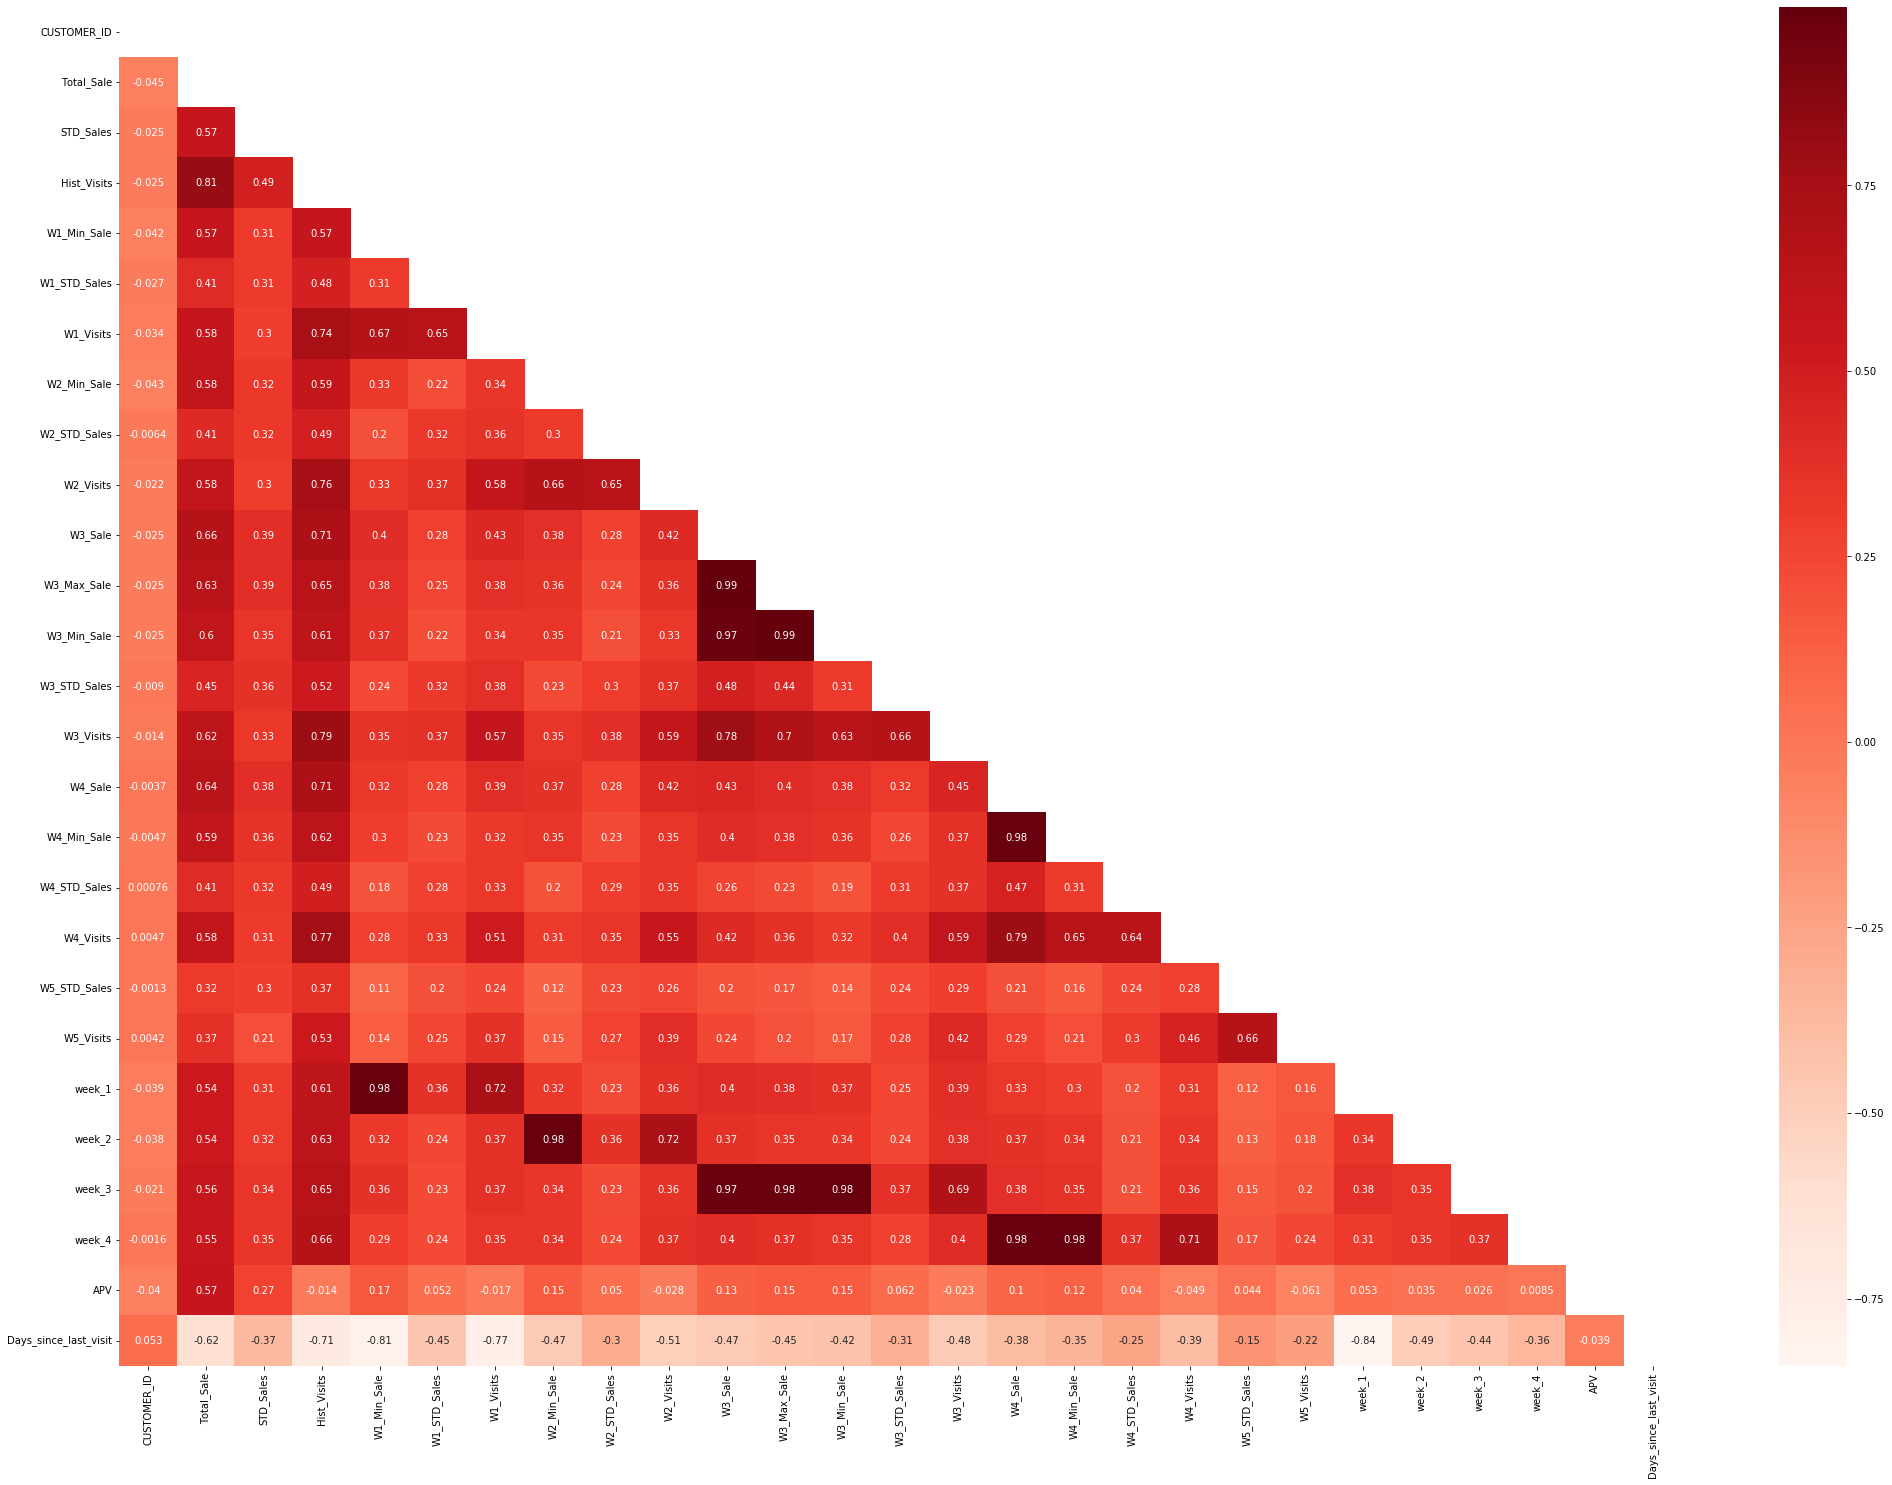

In [19]:
# relationship plot which is the correlation plot thus i have used heatmap plot.
plt.figure(figsize = (35,25)) 
sns.heatmap(df.corr() , annot = True , cmap = 'Reds' , mask = np.triu(df.corr()))

Data Preparation

Scale / Transform/ clean the data so that it is suitable for model building.


In [22]:
# making a copy of dataset 
df_copy = df.copy(deep = True) 

In [23]:
# Dropping of customer_id,customer_value and vistors_type   
df_copy.drop(columns = ['CUSTOMER_ID','Customer_Value','Visitors_Type'] , inplace = True)

In [114]:
# checking for missing values in the given dataset
missing_values = pd.DataFrame({'No of missing values': df_copy.isnull().sum(),                              
                               'Percentage of missing values': round((df_copy.isnull().sum() / len(df))*100 , 2)}) 
missing_values
print("Missing Values")
print(missing_values)

Missing Values
                       No of missing values  Percentage of missing values
Total_Sale                                0                           0.0
STD_Sales                                 0                           0.0
Hist_Visits                               0                           0.0
W1_Min_Sale                               0                           0.0
W1_STD_Sales                              0                           0.0
W1_Visits                                 0                           0.0
W2_Min_Sale                               0                           0.0
W2_STD_Sales                              0                           0.0
W2_Visits                                 0                           0.0
W3_Sale                                   0                           0.0
W3_Max_Sale                               0                           0.0
W3_Min_Sale                               0                           0.0
W3_STD_Sales           

missing_values table shows that there is no missing values present in given dataset 

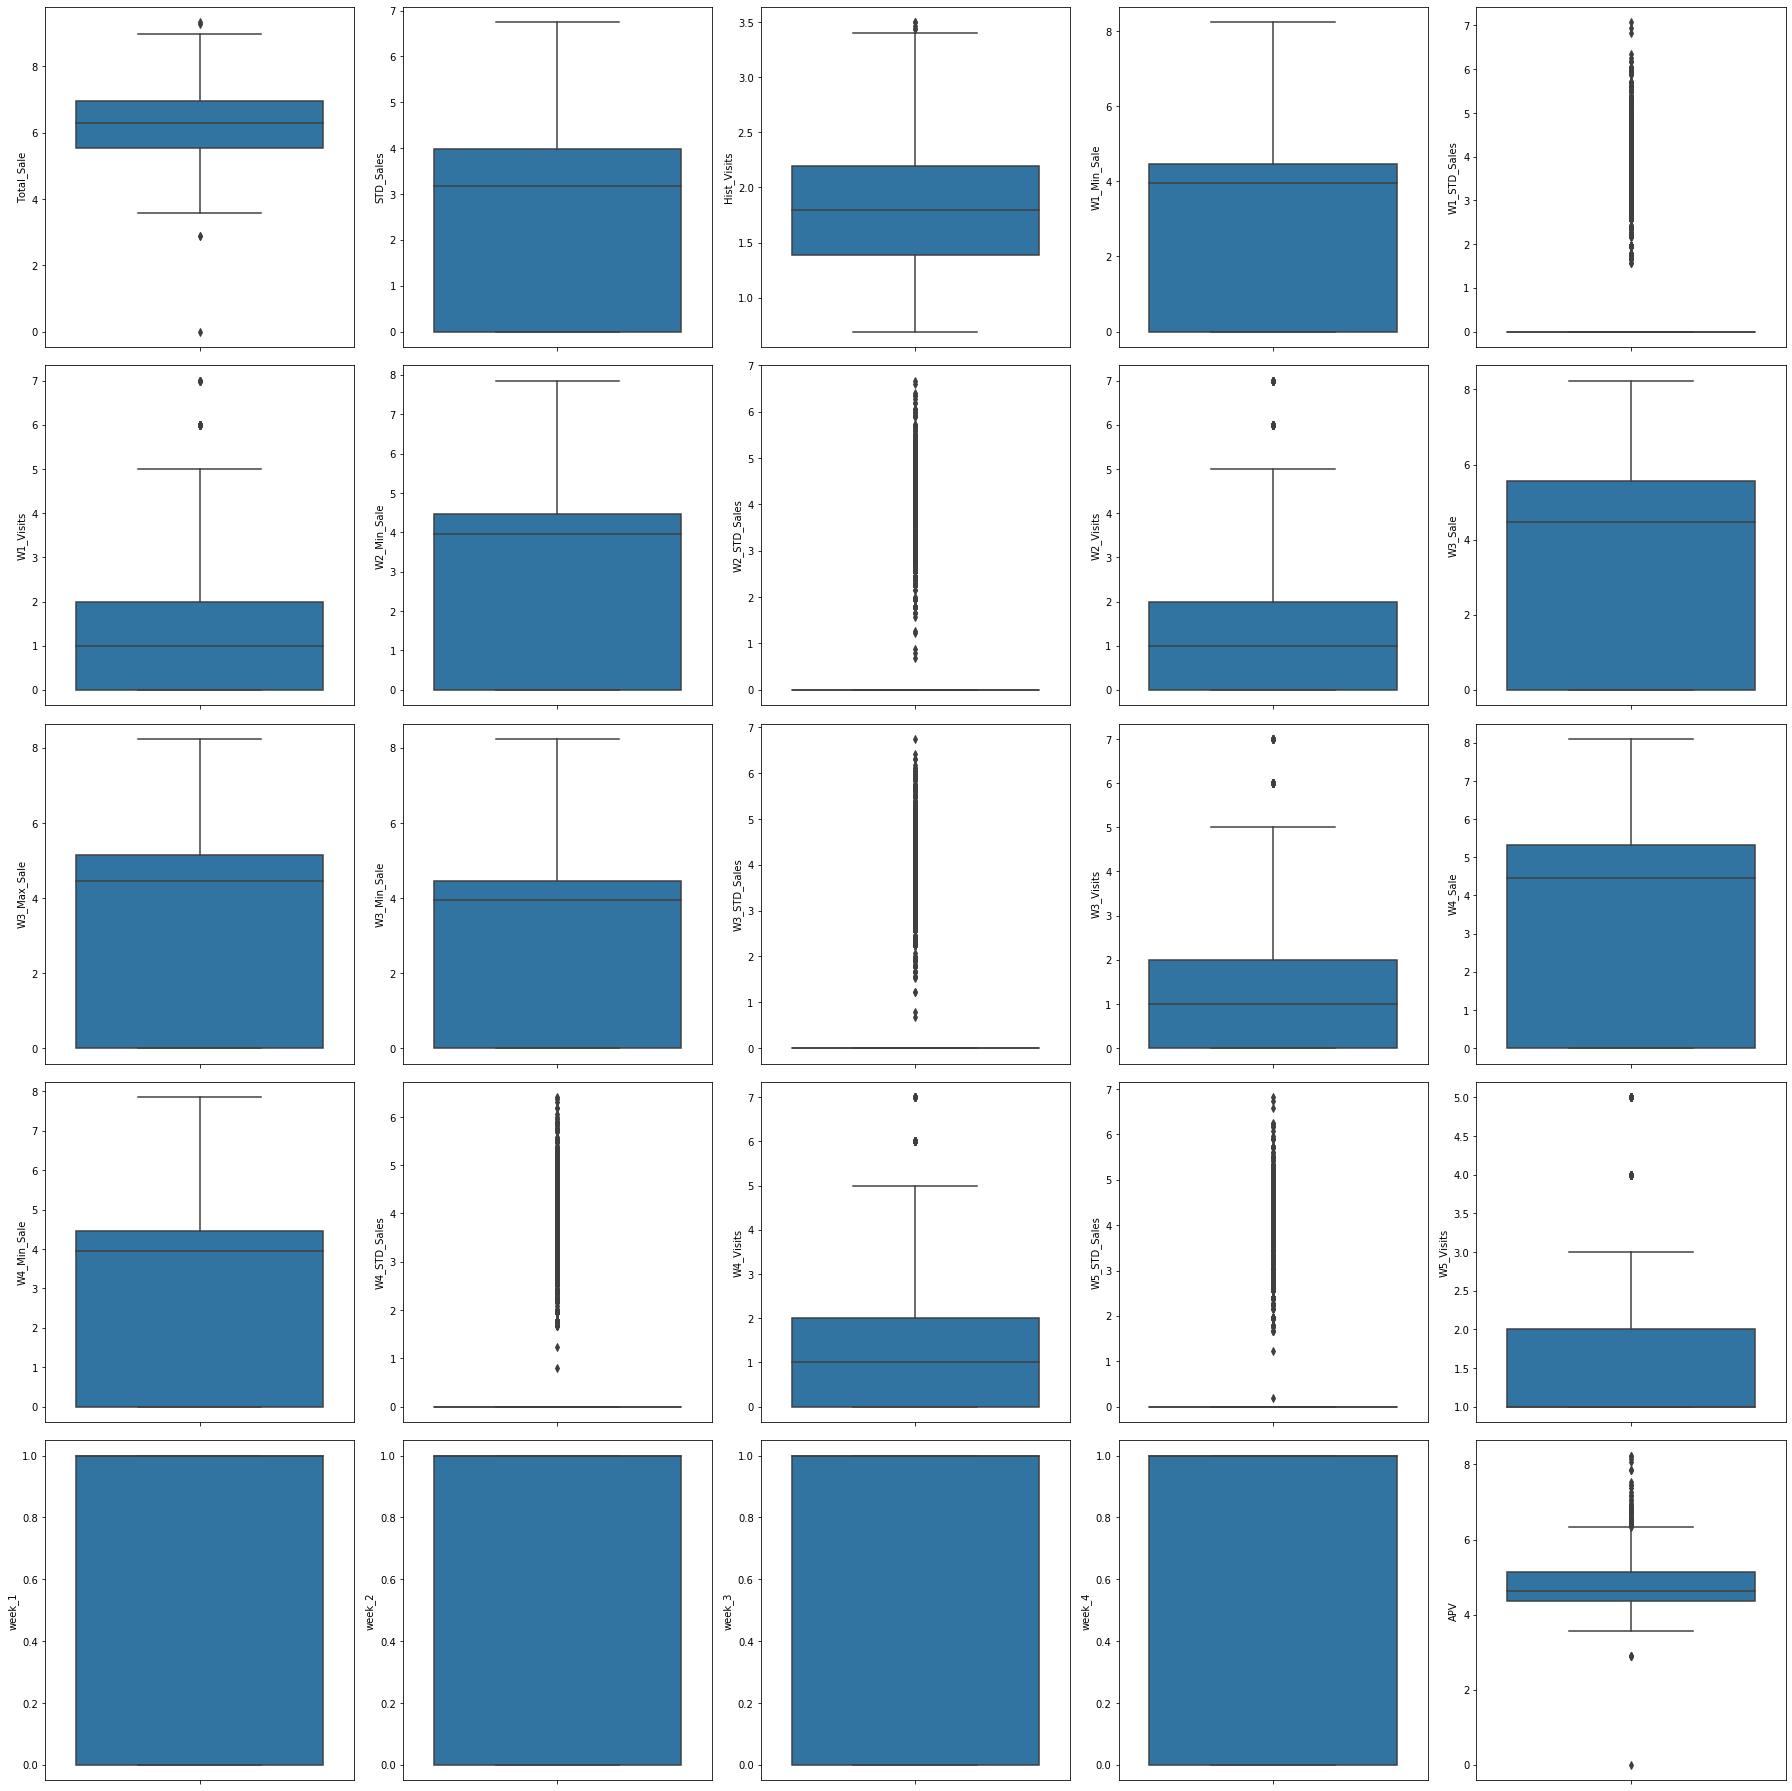

In [28]:
# Finding out the outliers in the dataset
f , ax = plt.subplots(5,5 , figsize = (25,25)) 
for i,v in zip(df_copy.columns , ax.flatten()):     
    sns.boxplot(y = df[i] , ax = v) 
plt.tight_layout() 
plt.show() 

   Outliers are visible in just a few variables, as seen by the box plot above. 
   We can use IQR method for the treating outliers but it may lose data. Thus we have used Power transformer methodology while treating outliers. 

In [29]:
# Outliers contains the columns which are containing the outliers in the dataset
Outliers = ['Total_Sale','W1_STD_Sales','W1_Visits','W2_STD_Sales','W2_Visits','W3_STD_Sales','W3_Visits',            
            'W4_STD_Sales','W4_Visits','W5_STD_Sales','W5_Visits','APV'] 

In [30]:
# Power Transformer treatment for the reducing the outliers
from sklearn.preprocessing import PowerTransformer 
pt = PowerTransformer() 
for i in Outliers:     
    df_copy[i] = pt.fit_transform(df_copy[[i]]) 

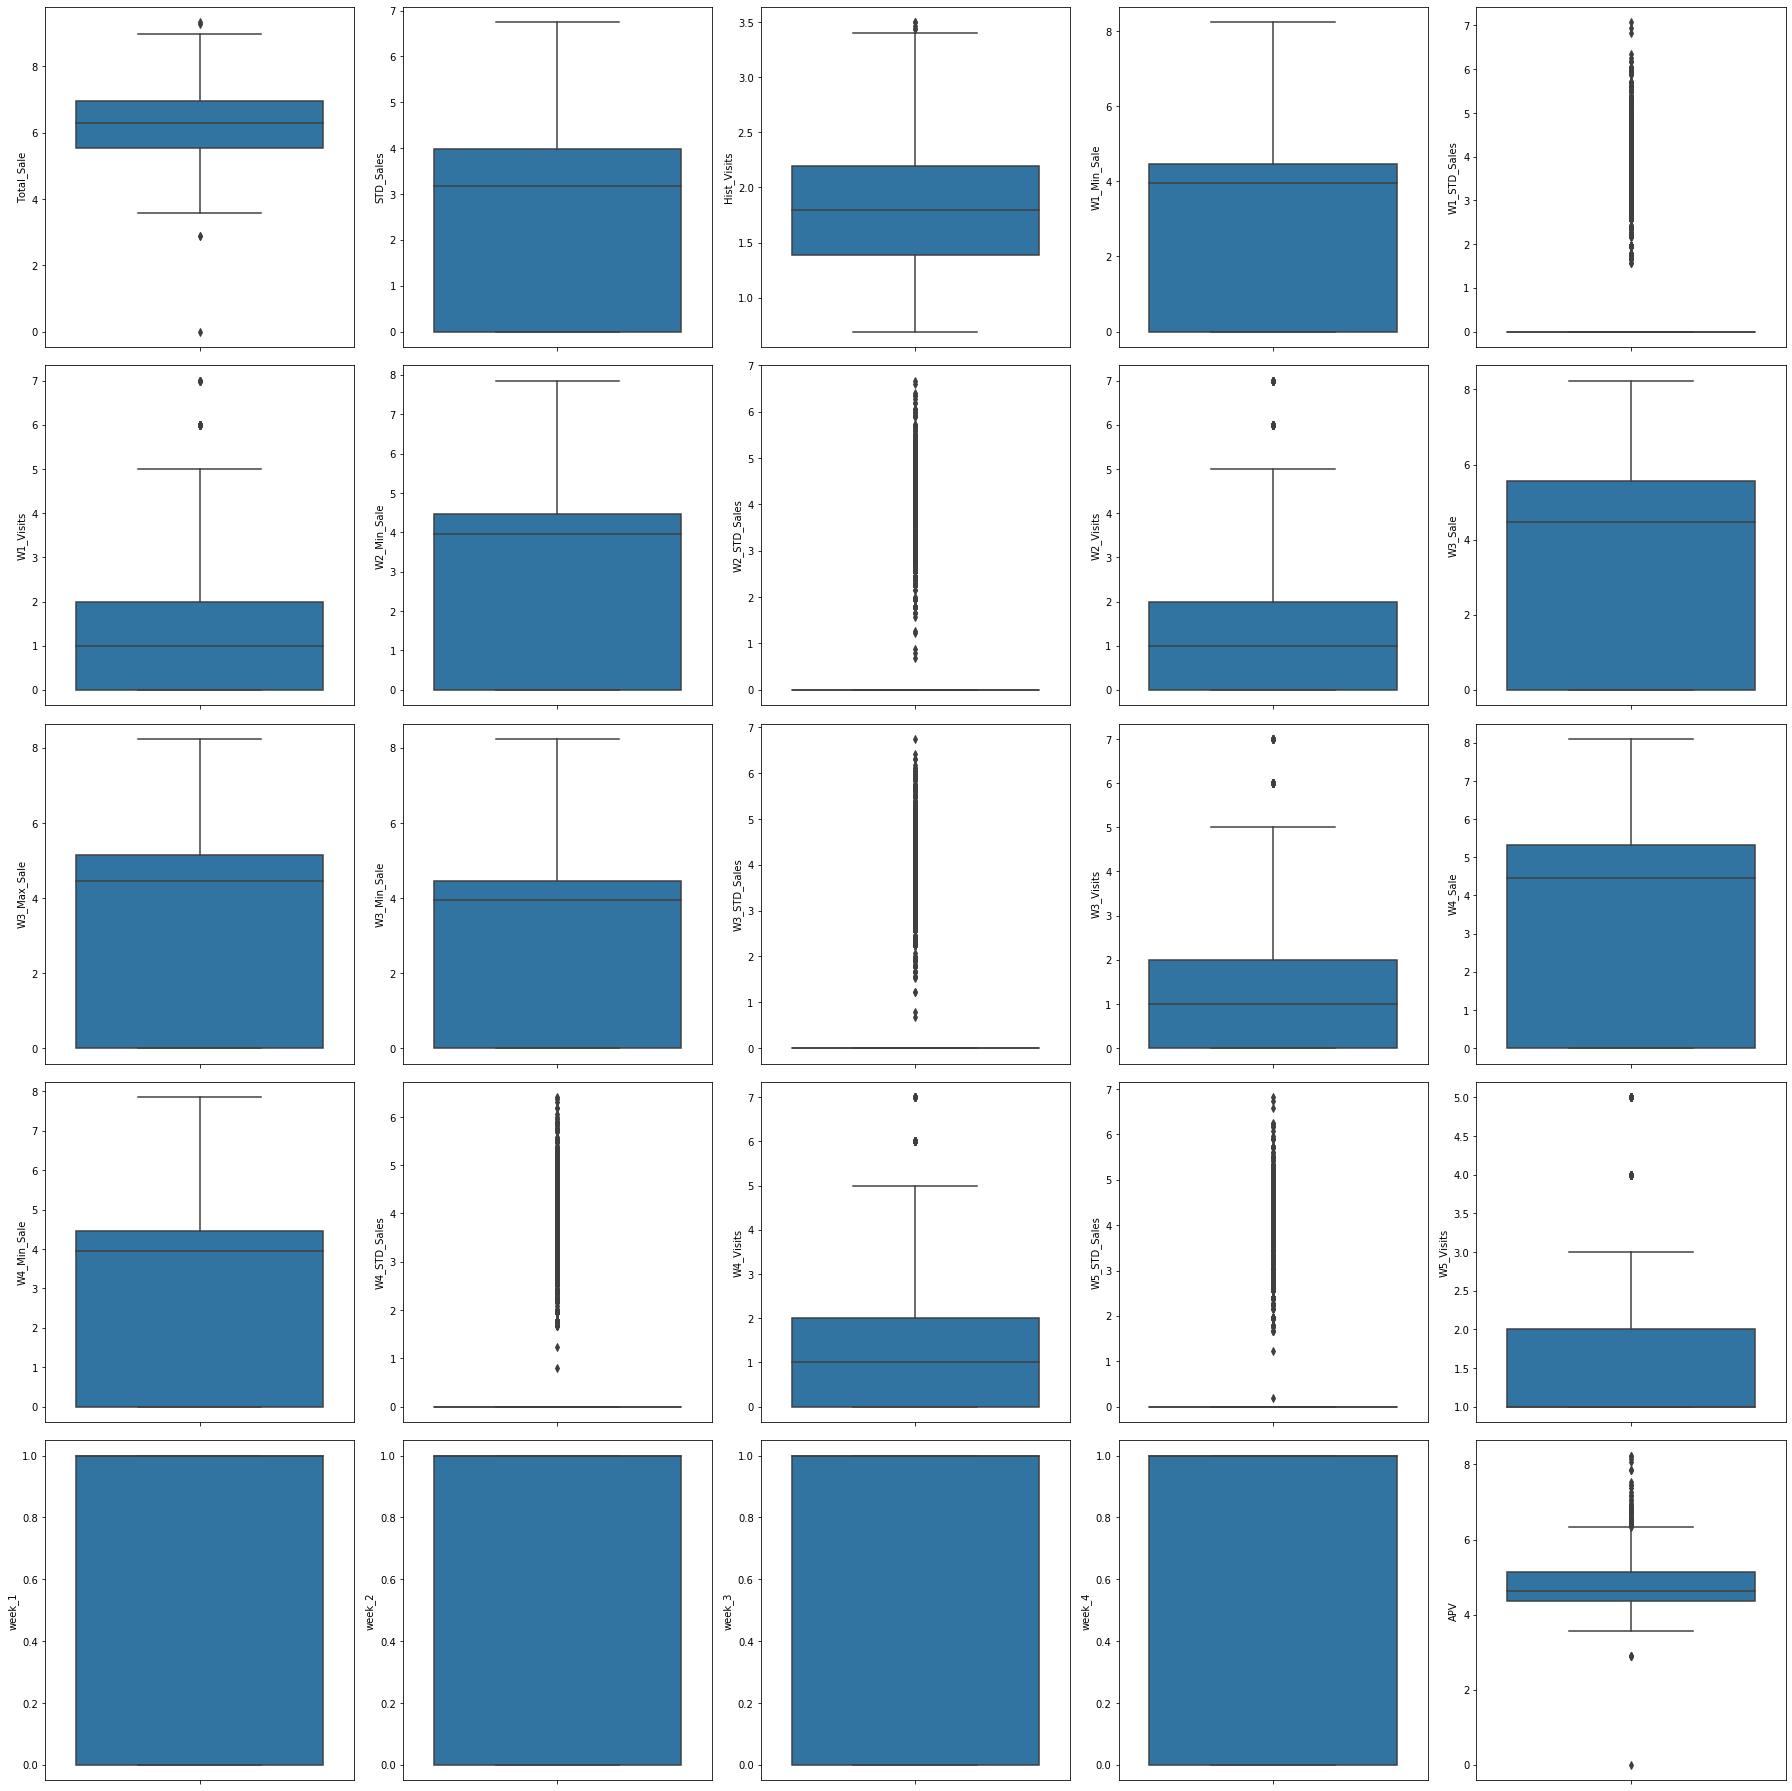

In [31]:
# outliers after transformation shown using the boxplot
f , ax = plt.subplots(5,5 , figsize = (25,25)) 
for i,v in zip(df_copy.columns , ax.flatten()):     
    sns.boxplot(y = df[i] , ax = v) 
plt.tight_layout() 
plt.show() 

By using PowerTransfomer teechnique we have treated outliers.

In [35]:
# Scaling of the given dataset
from sklearn.preprocessing import StandardScaler 
SS = StandardScaler() 
for i in df_copy.columns:
    df_copy[i] = SS.fit_transform(df_copy[[i]])

### 3.	Dimensionality Reduction 

How will we decide when to apply PCA based on the correlation?

PCA stands for Principal Component Analysis. 
For each variable, the eigen value and eigen vector are computed, and the number of components is determined based on the amount of variation that has to be explained.  
By dot matrix multiplication of variables and eigenvectors we get components

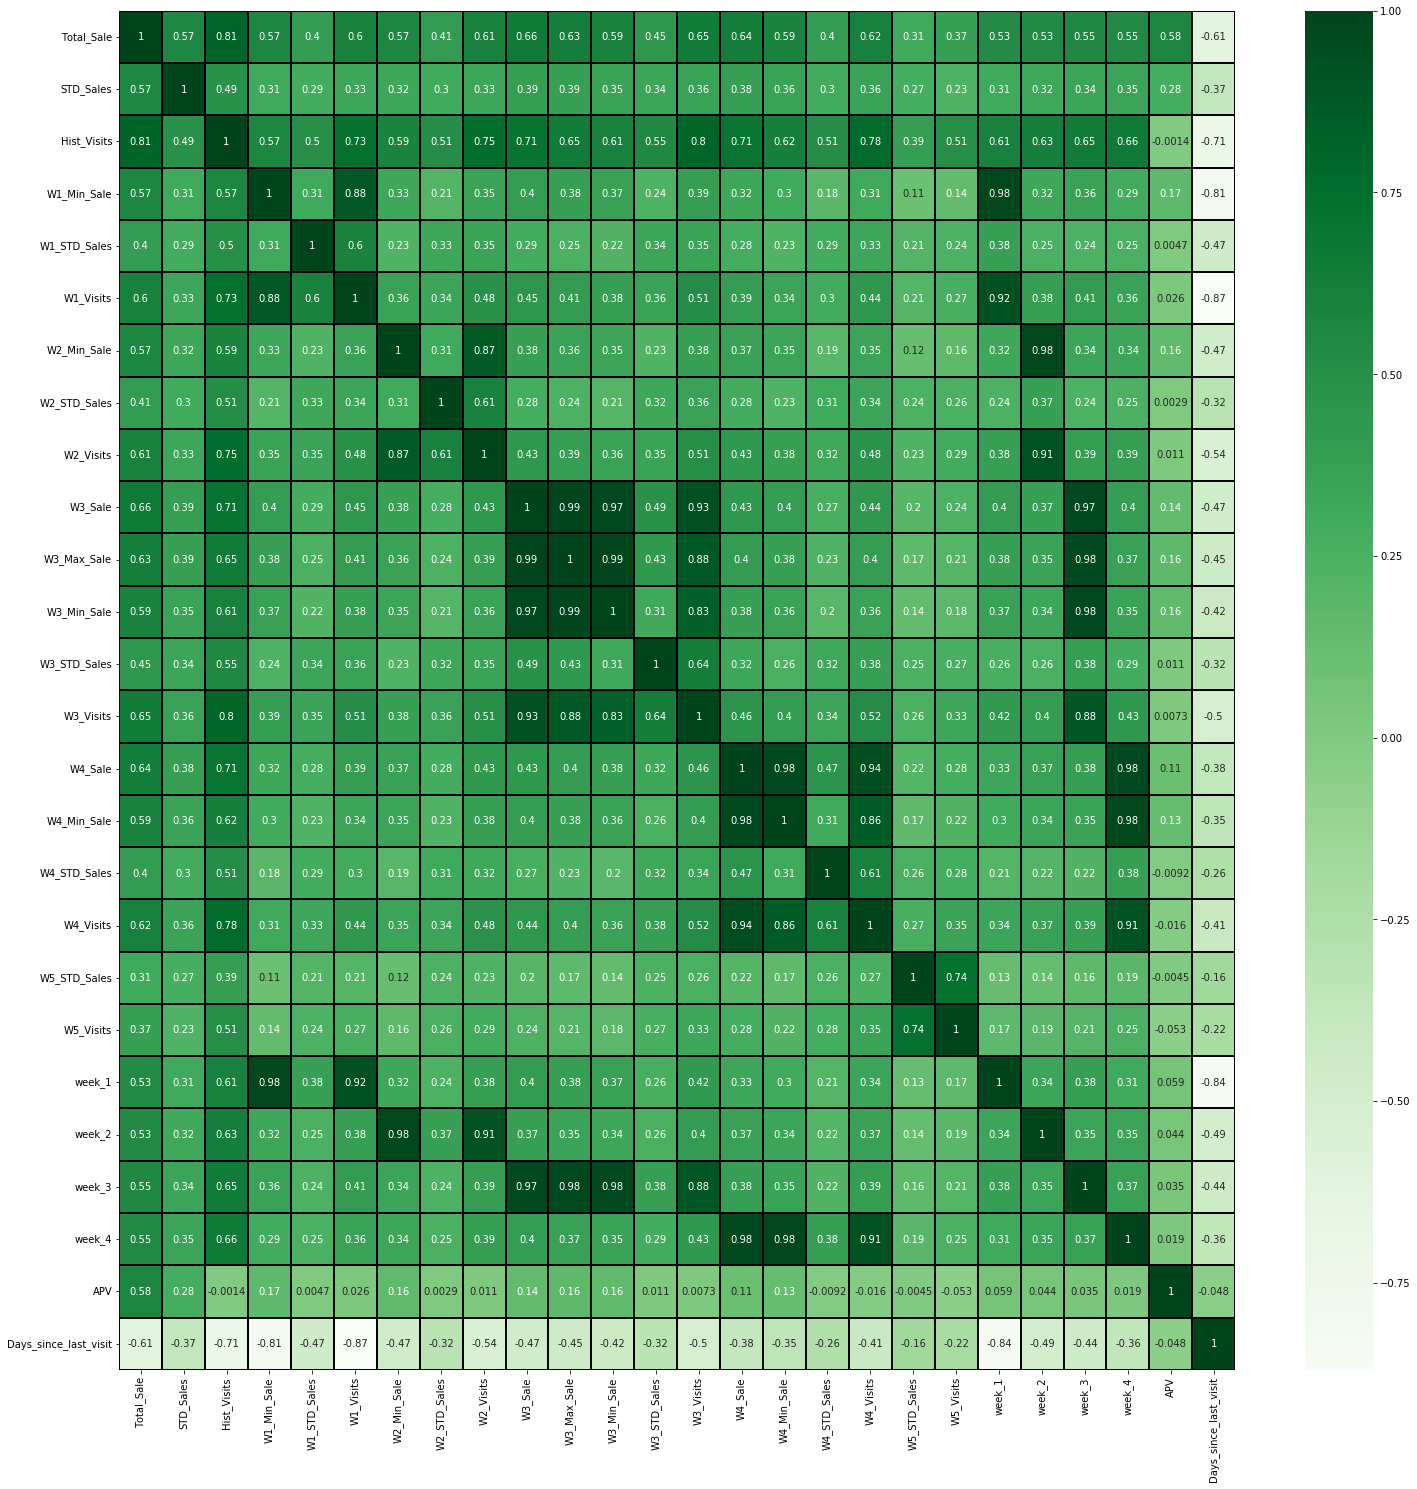

In [43]:
# heatmap for the finding out the correlation between the columns we have used the heatmap
plt.figure(figsize = (25,25)) 
sns.heatmap(df_copy.corr(), annot = True , cmap = 'Greens' ,
            linewidth = 1.0 , linecolor = 'Black') 
plt.show()

The heatmap above makes it rather plain that multicollinearity exists. 
When there is a correlation between the independent variables, this is known as multicollinearity. 
The correlation is between 0.5 to -0.5 have more multicollinearity

For the given dataset we can perform pca since there is multicollinearity is present.

In [115]:
from sklearn.decomposition import PCA 
pca = PCA().fit(df_copy) 
pca
eigen_value = pca.explained_variance_ 
eigen_value

array([1.15534538e+01, 2.63115096e+00, 2.41622594e+00, 1.86744061e+00,
       1.76179628e+00, 1.38328475e+00, 9.99643919e-01, 6.78608213e-01,
       6.55679697e-01, 6.38740653e-01, 6.00510598e-01, 2.68311616e-01,
       1.77013756e-01, 1.34804269e-01, 5.89416328e-02, 4.94116379e-02,
       4.08624512e-02, 2.70642199e-02, 2.01939082e-02, 1.28523080e-02,
       9.56122460e-03, 8.47990619e-03, 3.79985871e-03, 3.32858963e-03,
       1.21134265e-03, 2.26323659e-04])

In [52]:
eigen_vector = pca.components_ 
eigen_vector

array([[ 2.53849097e-01,  1.61846647e-01,  2.82483171e-01,
         1.86997733e-01,  1.47067884e-01,  2.17533117e-01,
         1.81561131e-01,  1.44129791e-01,  2.12231129e-01,
         2.35886793e-01,  2.24872546e-01,  2.13698353e-01,
         1.62276438e-01,  2.43397246e-01,  2.15373745e-01,
         1.97763379e-01,  1.41902899e-01,  2.20841313e-01,
         1.02049048e-01,  1.22868668e-01,  1.93217836e-01,
         1.86090781e-01,  2.18685036e-01,  2.01310971e-01,
         4.26015343e-02, -2.17663754e-01],
       [ 1.47783115e-02,  3.10018565e-02,  6.33289129e-02,
        -7.72820535e-02,  5.00205714e-02, -2.42061506e-02,
         6.16033636e-02,  9.67424382e-02,  9.93010284e-02,
        -3.14418244e-01, -3.36622342e-01, -3.49580115e-01,
        -3.89848129e-02, -2.29848010e-01,  3.09386072e-01,
         2.95641933e-01,  1.95817934e-01,  3.06145917e-01,
         1.19046504e-01,  1.32937693e-01, -6.67215454e-02,
         7.50672387e-02, -3.39215214e-01,  3.10835182e-01,
        -5.66

In [54]:
#Calculating cumulative_sum of variance 
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)*100 
cumulative_sum

array([ 44.43192017,  54.55072028,  63.84296831,  71.02471443,
        77.80017685,  83.11997113,  86.96437123,  89.57414199,
        92.09573497,  94.55218429,  96.86160963,  97.89347426,
        98.57422837,  99.09265451,  99.31933045,  99.50935622,
        99.66650379,  99.77058654,  99.84824765,  99.89767467,
        99.93444493,  99.9670567 ,  99.98167008,  99.99447107,
        99.99912961, 100.        ])

Based on the cumulative sum total of explained_variance_ratio, 
we may conclude that totally 9 components are required to explain 90% of the variation in the data.

In [55]:
model1_pca = PCA(n_components= 0.90).fit_transform(df_copy) 
model1_pca

array([[ 1.63767119, -0.60389072,  0.03268888, ..., -1.04975451,
         0.01182082, -0.10286646],
       [ 4.93590903,  0.34127318,  0.17576528, ...,  3.04953683,
        -0.08218084,  0.25855012],
       [ 1.15136767, -0.01021577, -0.76272633, ...,  0.3213408 ,
        -1.90803683,  0.32570359],
       ...,
       [-4.3311229 , -1.87847767, -1.31649701, ..., -0.14754312,
        -0.04656185,  0.20349255],
       [-7.1445968 ,  1.0450897 , -0.09326356, ..., -1.16385681,
         0.1763464 , -0.81230022],
       [-6.14950273,  0.25317682, -0.09794009, ...,  0.25729425,
         0.06068739, -0.02782117]])

Building a data frame with the principal components and check if multi-collinearity still exists.

In [56]:
columns = ['PC' + str(i) for i in range(1,10)] 
df_pca = pd.DataFrame(model1_pca , columns = columns)

In [57]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.637671,-0.603891,0.032689,-0.395780,-1.434448,1.307857,-1.049755,0.011821,-0.102866
1,4.935909,0.341273,0.175765,0.513462,0.139767,0.394386,3.049537,-0.082181,0.258550
2,1.151368,-0.010216,-0.762726,-3.112716,0.061989,0.776510,0.321341,-1.908037,0.325704
3,6.129177,0.819172,0.887152,0.898363,2.912377,0.904706,0.061632,1.899827,0.463323
4,2.102765,-0.587824,-0.103386,-0.523069,-2.322496,-0.451800,-1.048513,-0.011812,0.077956


Visualizing the spread of data across PCA components

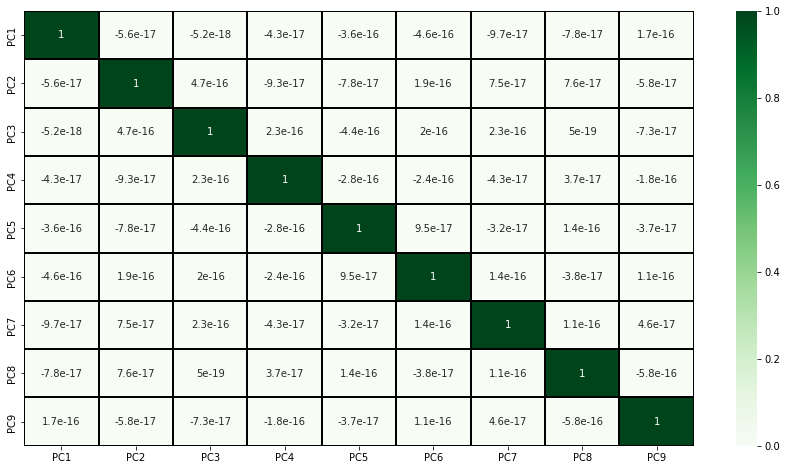

In [59]:
plt.figure(figsize = (15,8)) 
sns.heatmap(df_pca.corr(), annot = True , cmap = 'Greens' ,  linewidth = 1.0 , linecolor = 'Black') 
plt.show()

After performing PCA, the correlational plot with 1 box will indicates the absence of multicollinearity in the data.

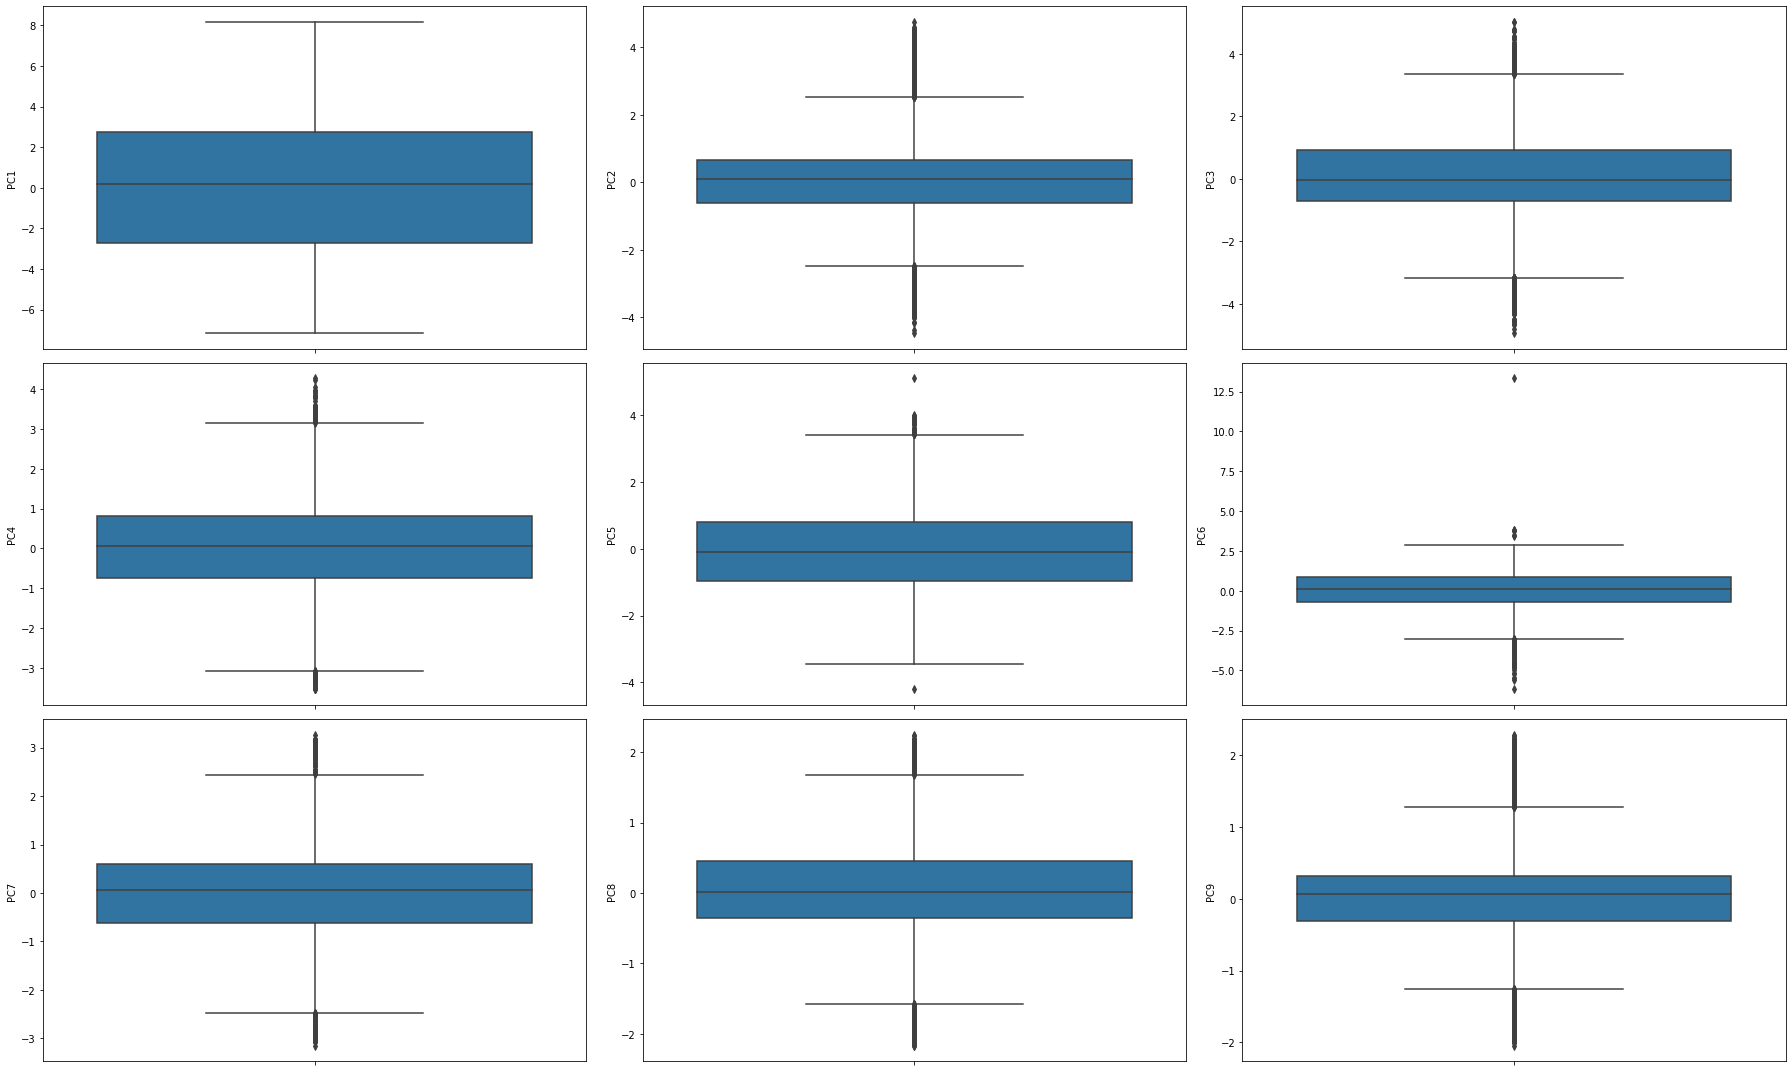

In [60]:
f , ax = plt.subplots(3,3 , figsize = (25,15)) 
for i,v in zip(df_pca.columns , ax.flatten()):     
    sns.boxplot(y = df_pca[i] , ax = v) 
plt.tight_layout() 
plt.show()

The box plot analysis reveals the presence of outliers in only a few variables. While the conventional approach of outlier treatment using the Interquartile Range (IQR) method might result in loss of data, we opt for the power transformer technique to address outliers.

Checking for outliers in the PCA data and treat the same

In [61]:
PT = PowerTransformer() 
for i in df_pca.columns:     
    df_pca[i] = PT.fit_transform(df_pca[[i]])

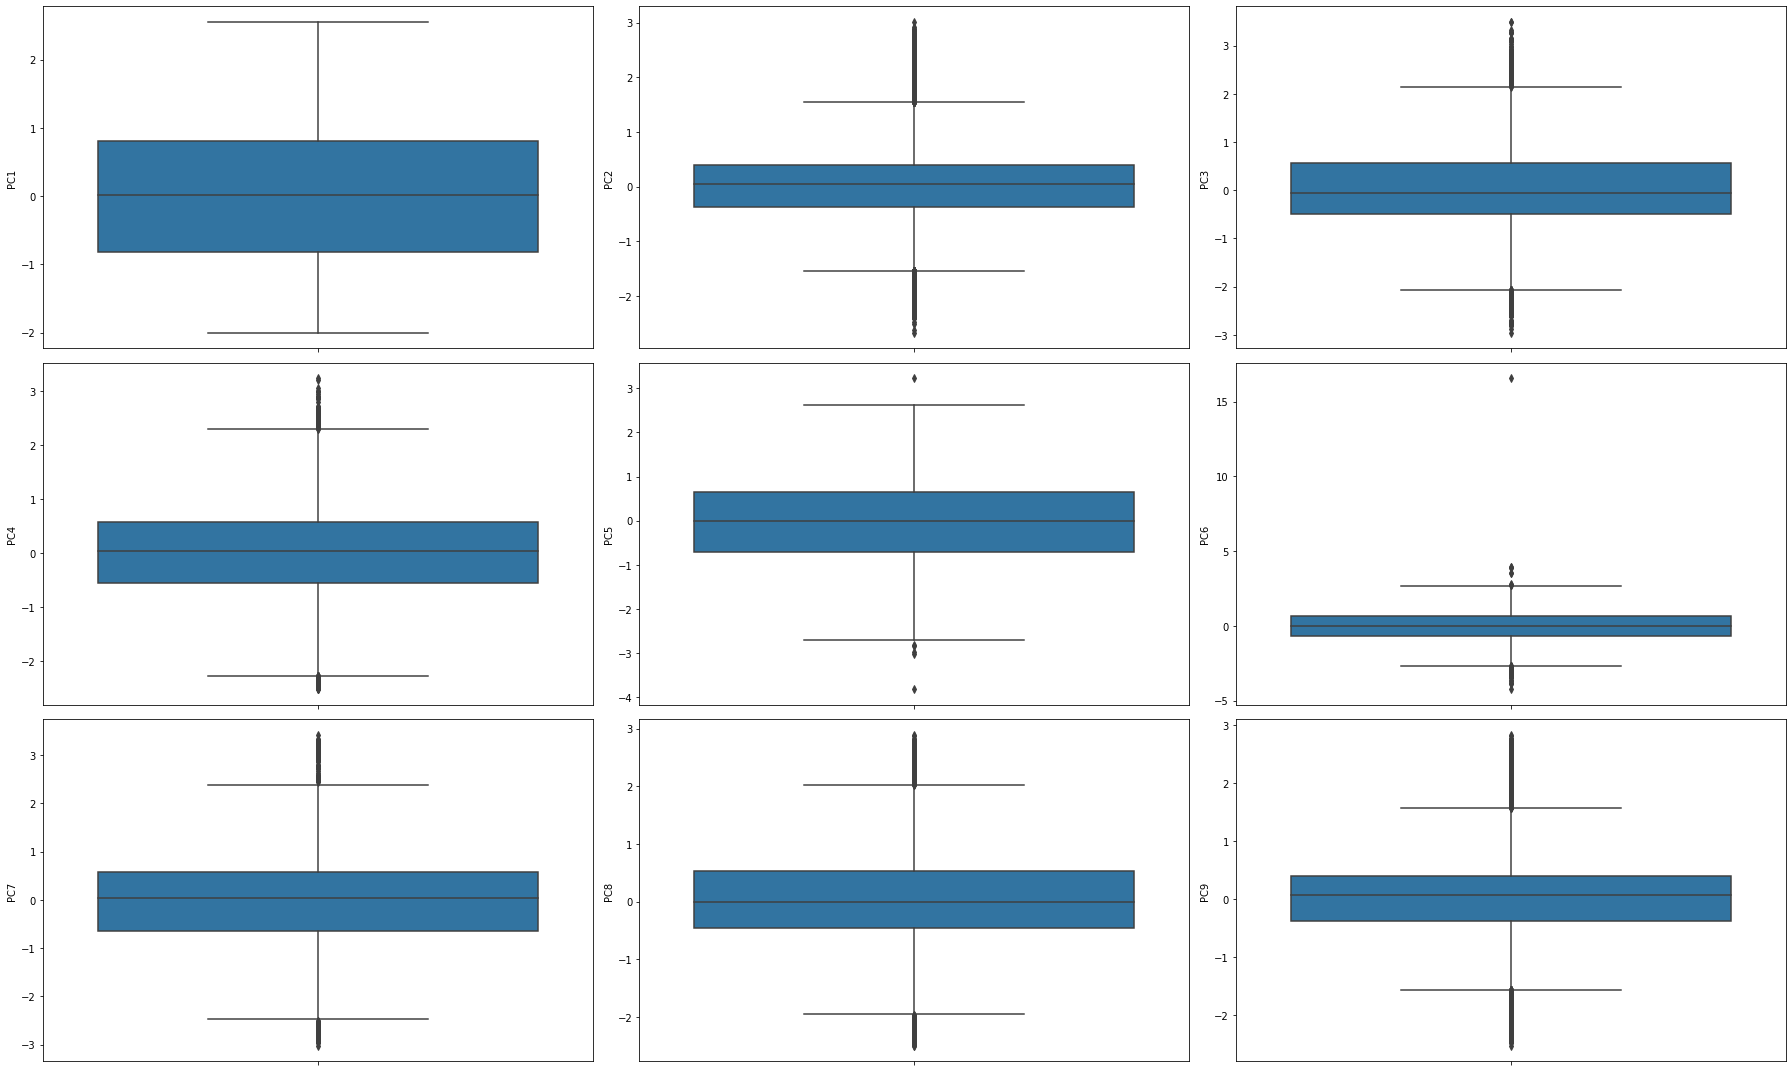

In [62]:
# after treating outliers
f , ax = plt.subplots(3,3 , figsize = (25,15)) 
for i,v in zip(df_pca.columns , ax.flatten()):     
    sns.boxplot(y = df_pca[i] , ax = v) 
plt.tight_layout() 
plt.show()

By using PowerTransfomer teechnique we have treated outliers

### 4.	Clustering: Use PCA dimensions to cluster the data. Applying K-means and Agglomerative clustering. 



Applying clustering and visualize the spread of data

In [65]:
# KMeans clustering 
from sklearn.cluster import KMeans 
# Using WCSS 
wcss = [] 
for i in range(2,8):     
    model = KMeans(n_clusters = i).fit(df_pca)     
    wcss.append(model.inertia_) 
    wcss

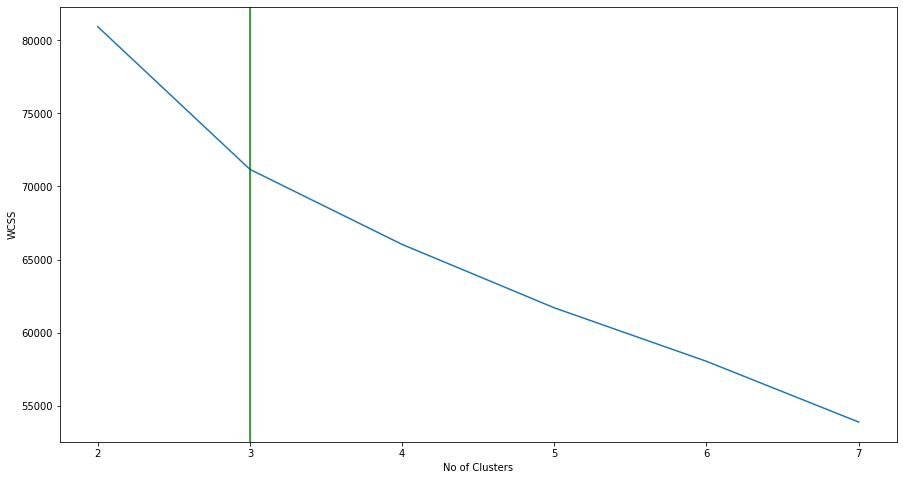

In [67]:
plt.figure(figsize = (15,8))
plt.plot(range(2,8) , wcss) 
plt.axvline(3 , c = 'green') 
plt.xticks(range(2,8)) 
plt.xlabel('No of Clusters') 
plt.ylabel('WCSS')
plt.show()

In [120]:
# Using silhouette score 
from sklearn.metrics import silhouette_score 
for i in range(2,11):     
    model = KMeans(n_clusters= i).fit(df_pca)     
    print(silhouette_score(df_pca , model.labels_)) 
    

0.21027802335717016
0.18987364530137757
0.1934574309223918
0.1846569942952828
0.19789770592262215
0.2056446782964298
0.21242676328830928
0.22262418535877496
0.21467205060235767


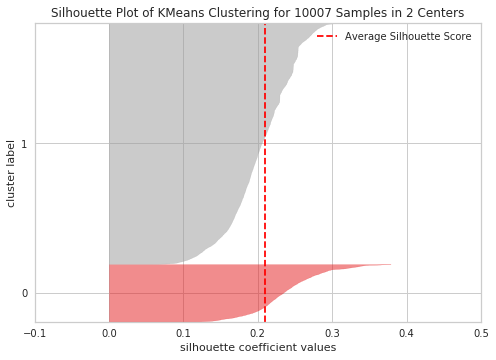

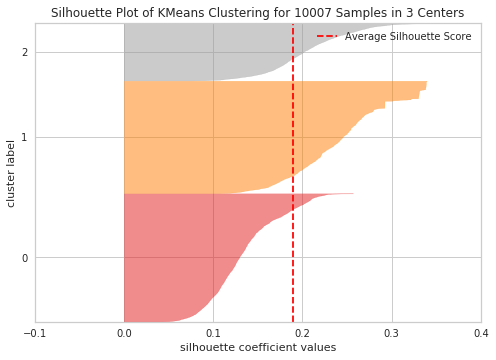

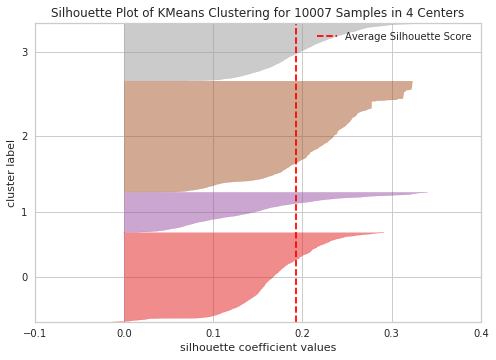

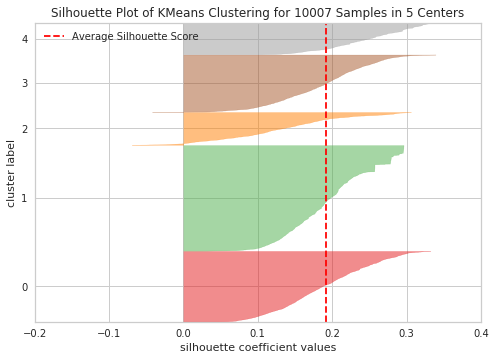

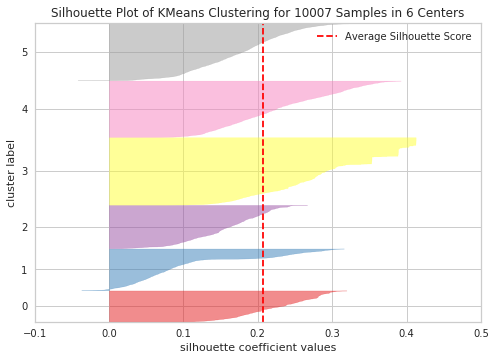

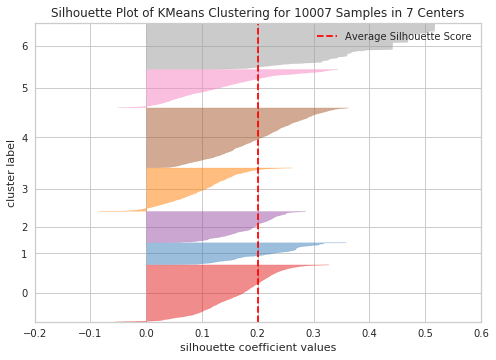

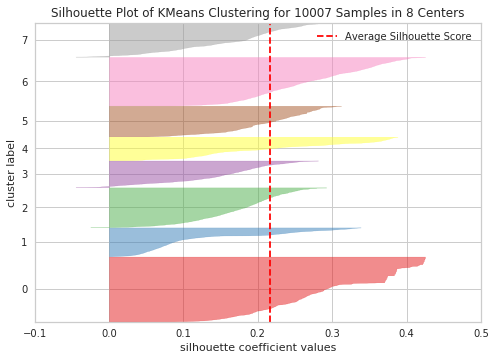

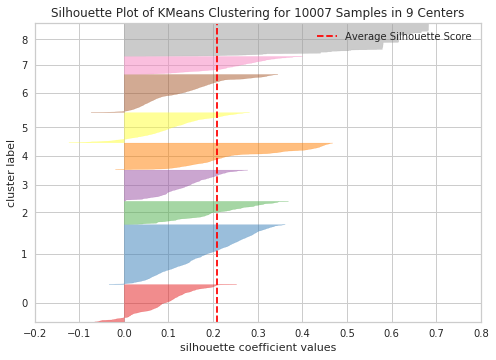

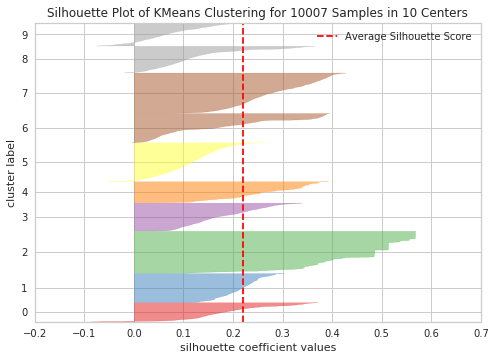

In [121]:
from yellowbrick.cluster import silhouette_visualizer 
for i in range(2,11):     
    silhouette_visualizer(KMeans(n_clusters = i) , df_pca) 

Both the Within-Cluster Sum of Squares (WCSS) and silhouette method suggest that the optimal number of clusters is 3. Therefore, we proceed to build a clustering model using 3 clusters. 

In [70]:
model_km = KMeans(n_clusters=3).fit(df_pca) 
df_pca['cluster_km'] = model_km.labels_ 
df_pca.head() 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster_km
0,0.454583,-0.383398,-0.013573,-0.303721,-1.120537,1.160270,-1.046641,-0.013055,-0.128023,0
1,1.498521,0.197616,0.079328,0.363137,0.185887,0.275025,3.185887,-0.127023,0.318439,2
2,0.304929,-0.020045,-0.515273,-2.223966,0.127751,0.634778,0.304624,-2.216165,0.401448,2
3,1.884738,0.496151,0.552227,0.650436,1.983771,0.759072,0.042117,2.424249,0.571606,0
4,0.599024,-0.373623,-0.101069,-0.395638,-1.942585,-0.450730,-1.045448,-0.041799,0.095284,0


In [72]:
# Spread of the labels 
S= df_pca['cluster_km'].value_counts() 
S

0    4307
1    3774
2    1926
Name: cluster_km, dtype: int64

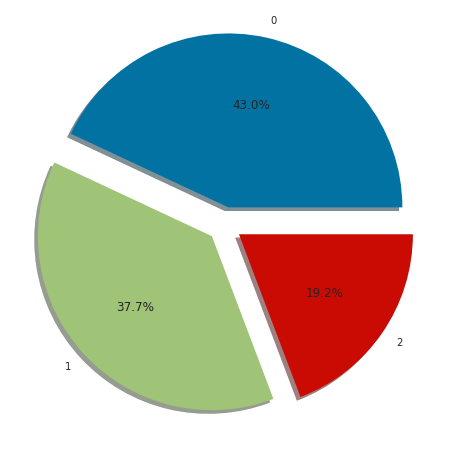

In [75]:
plt.figure(figsize = (15,8)) 
plt.pie(S, labels = S.index , autopct = '%.1f%%' , shadow = True , explode = [0.1,0.1,0.1]) 
plt.show()

In [76]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage , cophenet , dendrogram 
from sklearn.metrics.pairwise import euclidean_distances
types = ['single' , 'complete' , 'average' , 'ward' , 'centroid'] 
coef_df = pd.DataFrame(columns = ['Method','Coef']) 
eucli_dist = euclidean_distances(df_pca.drop(columns = 'cluster_km'))[np.triu_indices(len(df_pca) , k = 1)] 
for i in types:     
    link = linkage(df_pca.drop(columns = 'cluster_km') , method = i)     
    coef , cophenet_dist = cophenet(link , eucli_dist)     
    coef_df = coef_df.append({'Method':i , 'Coef':coef} , ignore_index = True) 
    coef_df

In [77]:
 coef_df

,Method,Coef
0,single,0.532240
1,complete,0.418526
2,average,0.687912
3,ward,0.512494
4,centroid,0.545530


The table indicates that for the average linkage method, the Cophenetic correlation coefficient value is higher compared to other methods. Hence, we opt to utilize this method to construct a dendrogram, aiming to determine the optimal number of clusters.

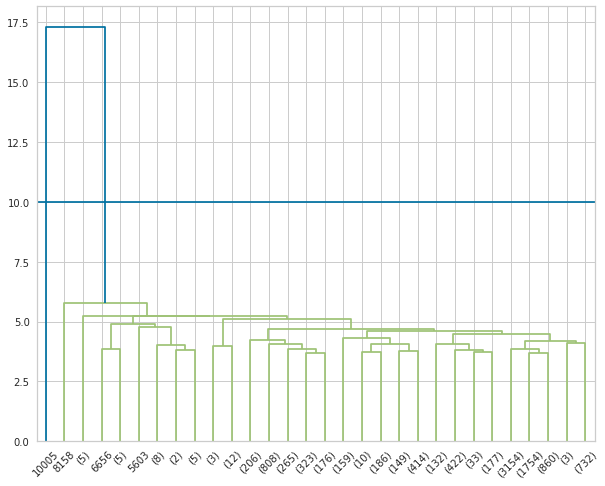

In [119]:
link_avg = linkage(df_pca.drop(columns = 'cluster_km') , method = 'average')
plt.figure(figsize = (10,8)) 
dendro = dendrogram(link_avg , truncate_mode='lastp') 
plt.axhline(10 , c = 'b')

By slicing a horizontal line through the longest vertical line in the dendrogram, we deduce that this dendrogram suggests 2 clusters as the optimal number. Therefore, we proceed to construct a clustering model with 2 clusters.

In [83]:
model_agg = AgglomerativeClustering(n_clusters= 2).fit(df_pca.drop(columns = 'cluster_km')) 
df_pca['cluster_agg'] = model_agg.labels_ 
df_pca.head(3) 


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster_km,cluster_agg
0,0.454583,-0.383398,-0.013573,-0.303721,-1.120537,1.160270,-1.046641,-0.013055,-0.128023,0,0
1,1.498521,0.197616,0.079328,0.363137,0.185887,0.275025,3.185887,-0.127023,0.318439,2,1
2,0.304929,-0.020045,-0.515273,-2.223966,0.127751,0.634778,0.304624,-2.216165,0.401448,2,1


In [84]:
# Spread of the labels 
s = df_pca['cluster_agg'].value_counts() 
s

0    8232
1    1775
Name: cluster_agg, dtype: int64

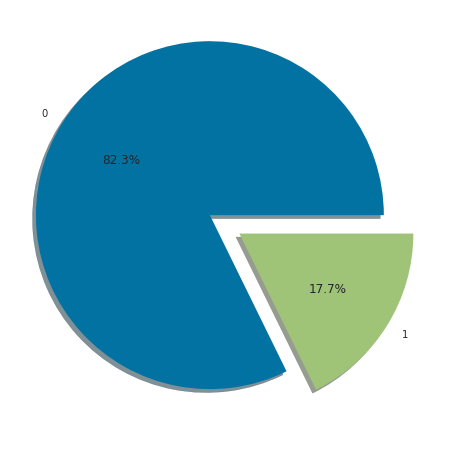

In [87]:
plt.figure(figsize = (15,8)) 
plt.pie(s , labels = s.index , autopct = '%.1f%%' , shadow = True , explode = [0.1,0.1]) 
plt.show() 

Evaluating the clusters formed using appropriate metrics(inertia,silhouette score) to support the model built and compare both the models

In [88]:
# Evaluating the clusters using silhouette score 
print('Kmeans cluster' , silhouette_score(df_pca.drop(columns = ['cluster_km','cluster_agg']) , model_km.labels_)) 
print('Agglomerative cluster' , silhouette_score(df_pca.drop(columns = ['cluster_km','cluster_agg']) , model_agg.labels_)) 

Kmeans cluster 0.16361580987023264
Agglomerative cluster 0.1500813928602821


Using best attributes based on the relationship between them we plot the clusters

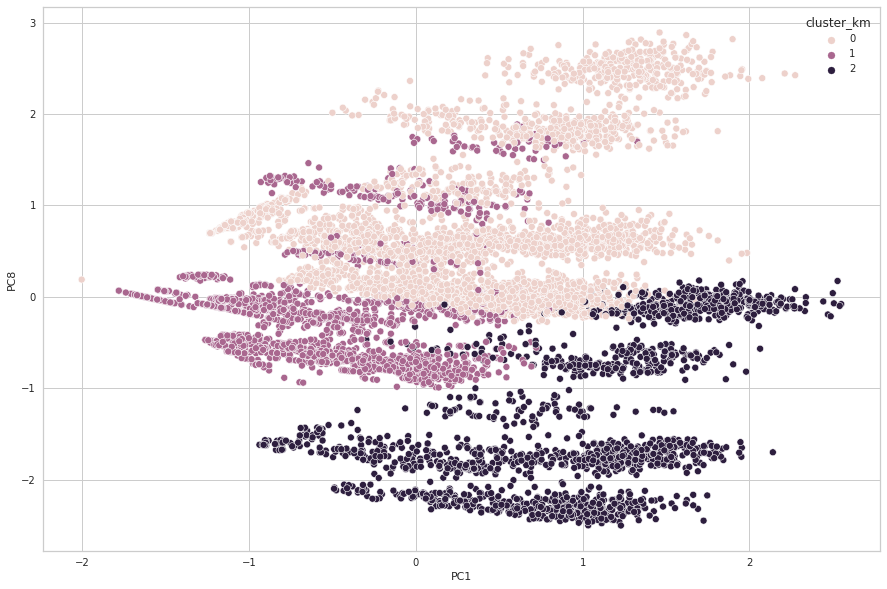

In [116]:
# KMeans clsutering 
plt.figure(figsize = (15,10)) 
sns.scatterplot(x = df_pca['PC1'] , y = df_pca['PC8'] , hue = df_pca['cluster_km']) 
plt.show() 

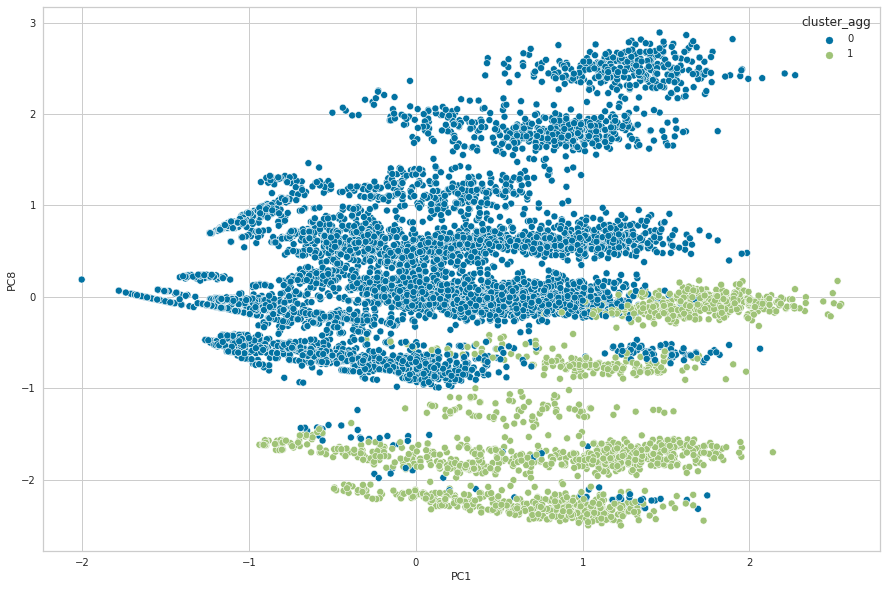

In [117]:
# Agglomerative Clustering 
plt.figure(figsize = (15,10)) 
sns.scatterplot(x = df_pca['PC1'] , y = df_pca['PC8'] , hue = df_pca['cluster_agg']) 
plt.show() 

The silhouette scores for both clusters do not exhibit significant differences; they are more or less the same. While the silhouette scores may suggest similar performance between the clusters in K-means and Agglomerative clustering, visual inspection reveals distinct differences. 
In K-means clustering, there appears to be overlapping of clusters, whereas in Agglomerative clustering, the clusters are noticeably separated. Indeed, based on the visual inspection and the clear separation of clusters observed in Agglomerative clustering compared to K-means, it suggests that Agglomerative clustering has provided the best optimal number of clusters for the given dataset. 

### 5.	Using the cluster labels from the best method above and interpret the clusters formed. 

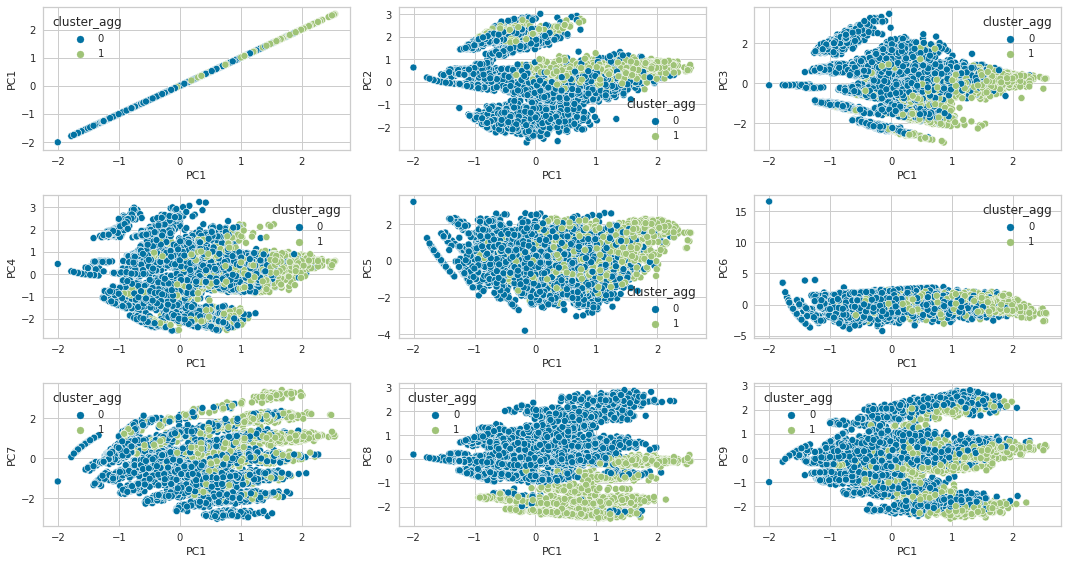

In [91]:
f , ax = plt.subplots(3,3,figsize = (15,8)) 
for i,v in zip(df_pca.columns , ax.flatten()):     
    sns.scatterplot(x = df_pca['PC1'] , y = df_pca[i] , ax = v , hue = df_pca['cluster_agg'] )    
plt.tight_layout() 
plt.show()

In [93]:
#For class 0 
df_pca[df_pca['cluster_agg'] == 0].drop(columns = ['cluster_km','cluster_agg']).describe().T 

,count,mean,std,min,25%,50%,75%,max
PC1,8232.0,-0.217814,0.916499,-2.004774,-0.985392,-0.228185,0.528435,2.274945
PC2,8232.0,-0.128074,1.015792,-2.680242,-0.509744,-0.064503,0.258969,3.013754
PC3,8232.0,0.060903,1.017791,-2.698743,-0.466454,-0.064932,0.664209,3.489431
PC4,8232.0,0.014303,1.028931,-2.522821,-0.592747,0.031955,0.596712,3.235395
PC5,8232.0,-0.084689,0.965632,-3.817557,-0.756635,-0.052783,0.576227,3.221433
PC6,8232.0,-0.017007,1.026890,-4.243107,-0.663568,-0.013964,0.687537,16.547251
PC7,8232.0,-0.177914,0.891234,-3.022858,-0.790127,-0.054407,0.422168,2.727456
PC8,8232.0,0.271159,0.799228,-2.320838,-0.132087,0.020330,0.634523,2.892236
PC9,8232.0,0.054428,0.958685,-2.410590,-0.315353,0.089553,0.424616,2.827260


In [94]:
# For class 1 
df_pca[df_pca['cluster_agg'] == 1].drop(columns = ['cluster_km','cluster_agg']).describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,1775.0,1.010168,0.708845,-0.938675,0.557693,1.110961,1.552448,2.551058
PC2,1775.0,0.593973,0.651390,-0.721420,0.201742,0.441847,0.725645,2.790853
PC3,1775.0,-0.282454,0.858795,-2.960773,-0.567284,-0.069423,0.259444,1.884794
PC4,1775.0,-0.066332,0.850541,-2.498080,-0.504073,0.025447,0.531237,2.236169
PC5,1775.0,0.392767,1.061573,-2.302893,-0.448942,0.271039,1.348869,2.331682
PC6,1775.0,0.078876,0.860626,-3.073423,-0.520003,0.088436,0.675164,2.419426
PC7,1775.0,0.825120,1.061815,-2.144122,0.073624,0.944822,1.349351,3.420502
PC8,1775.0,-1.257568,0.868112,-2.502784,-1.882672,-1.639144,-0.178778,0.178583
PC9,1775.0,-0.252424,1.139778,-2.522901,-0.905455,-0.053970,0.345490,2.445878


 For class 0 there are 8232 rows 
 For class 1 there are 1775 rows 
 Mean , Std can be known from the tables

### 6.	Summarize as follows 



Summarizing the overall fit of the model: Comparing all the clustering models built and list down the measures to prove that it is a good model.

In [96]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score , f1_score , log_loss , classification_report

In [ ]:
#RandomForestClassifier

In [98]:
x = df_pca.drop(columns = ['cluster_km','cluster_agg']) 
y = df_pca['cluster_km'] 
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.30 , random_state = 42) 
model_rf = RandomForestClassifier().fit(xtrain , ytrain)
model_rf

RandomForestClassifier()

In [99]:
pred_test = model_rf.predict(xtest) 
print('Accuracy score',accuracy_score(ytest,pred_test)) 

Accuracy score 0.999000999000999


In [101]:
print('F1 score',f1_score(ytest,pred_test,average='weighted'))

F1 score 0.999000680520708


In [109]:
print('Classification report')
print(classification_report(ytest,pred_test))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2470
           1       1.00      1.00      1.00       533

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003



In [104]:
# Agglomerative clustering
x = df_pca.drop(columns = ['cluster_km','cluster_agg']) 
y = df_pca['cluster_agg'] 
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.30 , random_state = 42) 
model_rf_agg = RandomForestClassifier().fit(xtrain , ytrain) 
model_rf_agg 

RandomForestClassifier()

In [107]:
pred_test = model_rf_agg.predict(xtest) 
print('Accuracy score',accuracy_score(ytest,pred_test)) 
print('F1 score',f1_score(ytest,pred_test,average='weighted')) 
print('Log loss',log_loss(ytest,pred_test)) 
print('Classification report')
print(classification_report(ytest,pred_test)) 

Accuracy score 1.0
F1 score 1.0
Log loss 9.992007221626413e-16
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2470
           1       1.00      1.00      1.00       533

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003



While both the K-means and Agglomerative clustering models demonstrated higher accuracy, the Agglomerative model exhibited lower error rates, suggesting better performance. Therefore, we can confidently select the Agglomerative model as the superior choice for our clustering analysis.

We have successfully segmented customers into two distinct groups based on their purchasing patterns and characteristics when visiting the e-commerce portal. We have preprocessed the data by removing the "Visitors_Type" target variable.
Outliers were treated using the power transformer technique, and then dataset was subsequently scaled for further analysis. 
To mitigate multicollinearity while retaining the information necessary for customer segmentation, we opted not to drop columns outright. Instead, we employed dimensionality reduction techniques like Principal Component Analysis (PCA) to transform the data into a lower-dimensional space while preserving most of the variance. 
This approach enables us to reduce the number of correlated variables while still capturing the essential patterns in the data. Performing PCA enabled us to address multicollinearity issues without sacrificing significant information from the dataset. 
By reducing the dimensionality of the data while preserving the most important patterns and variations, PCA allowed us to effectively group customers based on their characteristics while minimizing the impact of correlated variables. 
This approach ensures that the resulting customer segments are meaningful and retain the essential features of the original dataset. 


To determine the optimal number of clusters, we utilized both K-means and Agglomerative clustering techniques. However, the number of clusters obtained from each model varied. 
To finalize the best number of groups, we employed various plotting techniques, such as the elbow method, silhouette score, and dendrogram analysis. 
These methods allowed us to assess the clustering performance and select the optimal number of clusters that best represented the underlying structure of the data.  
Following the determination of 2 groups through Agglomerative clustering, a RandomForest model was constructed to predict unseen customers and categorize them based on their characteristics. 
Remarkably, this model exhibited high accuracy and low error rates when trained using the clusters identified by Agglomerative clustering. 
Consequently, after careful consideration of these steps, we concluded that the Agglomerative model stands out as our best-performing model.

A primary risk is the aging of both the data and our model. 
While our model achieved high accuracy due to the current dataset, it's essential to recognize that customer characteristics may evolve over time. 
Therefore, the effectiveness of our model could diminish as the dataset becomes outdated, highlighting the importance of regularly updating and retraining the model to maintain its relevance.  
Indeed, to sustain the accuracy of our model over time, it's crucial to periodically assess its performance and incorporate new data into our dataset. 
By regularly testing and retraining the model with updated data, we ensure that it remains aligned with the evolving trends and patterns in customer behavior. 
This proactive approach enables us to maintain the efficiency and effectiveness of the model in making accurate predictions and informed decisions.  
Absolutely, the presence of high correlation among independent variables can lead to multicollinearity issues, which can adversely affect the performance of clustering algorithms and other predictive models. 
PCA effectively addresses this challenge by transforming the original correlated variables into a new set of uncorrelated variables (principal components) while retaining most of the variance in the data. 
This not only helps in reducing the dimensionality of the dataset but also mitigates multicollinearity, allowing for more effective classification or clustering of customers based on their characteristics. 
Therefore, PCA plays a crucial role in improving the effectiveness of predictive models and ensuring accurate classification or clustering outcomes. 